# Preprocessing
* drop subject
* drop date
* remove duplicate
* remove twitter tags
* remove header
* drop missing text
* delete real news tags, reduce capital in fake news
* delete frequent occuring words


In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


df_train = pd.read_csv('https://raw.githubusercontent.com/joshuasir/dl-project/main/datasets/news-train-data.csv')
df_unseen = pd.read_csv('https://raw.githubusercontent.com/joshuasir/dl-project/main/datasets/news-unseen-data.csv')

# this datasets is already added 4702 from https://www.kaggle.com/mrisdal/fake-news.
# the pure datasets is in https://raw.githubusercontent.com/joshuasir/datasets/master/news-train-data.csv 
# and https://raw.githubusercontent.com/joshuasir/datasets/master/news-test-data.csv taken from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_train1 = pd.read_csv('https://raw.githubusercontent.com/joshuasir/datasets/master/news-train-data.csv')
df_unseen1 = pd.read_csv('https://raw.githubusercontent.com/joshuasir/datasets/master/news-test-data.csv')

In [ ]:
df_train.append(df_unseen)[df_train.append(df_unseen)['text'].isin(df_train1.append(df_unseen1)['text'])]['validity'].value_counts()

0    23483
1    21417
Name: validity, dtype: int64

In [ ]:
df_train.append(df_unseen)['validity'].value_counts()

0    28183
1    21417
Name: validity, dtype: int64

In [ ]:
df_train.drop_duplicates(subset='text',inplace=True,ignore_index=True)
df_train.drop_duplicates(subset='title',inplace=True,ignore_index=True)

df_unseen.drop_duplicates(subset='text',inplace=True,ignore_index=True)
df_unseen.drop_duplicates(subset='title',inplace=True,ignore_index=True)

In [ ]:
df_train['text'] = [x.split(' (Reuters) -',1)[-1] for x in df_train['text'] if x.split(' (Reuters) -',1)[1:] is not ''  ]
df_unseen['text'] = [x.split(' (Reuters) -',1)[-1] for x in df_unseen['text'] if x.split(' (Reuters) -',1)[1:] is not ''  ]

In [ ]:
df_train['title'] = df_train['title'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df_unseen['title'] = df_unseen['title'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

df_train['text'] = df_train['text'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df_unseen['text'] = df_unseen['text'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [ ]:
# df_train.drop(columns=['subject','date'],inplace=True)
# df_unseen.drop(columns=['subject','date'],inplace=True)

In [ ]:
df_train.drop(index=df_train.loc[(df_train.text.str.strip(' ') == '') ,'validity'].index,inplace=True)
df_unseen.drop(index=df_unseen.loc[(df_unseen.text.str.strip(' ') == '') ,'validity'].index,inplace=True)

In [ ]:
df_train['title'] = df_train['title'].str.title()
df_unseen['title'] = df_unseen['title'].str.title()

df_train['text'] = df_train['title'].str.lower()
df_unseen['text'] = df_unseen['title'].str.lower()

In [ ]:
df_train['text'] = df_train['title'] + ' - ' + df_train['text']
df_unseen['text'] = df_unseen['title'] + ' - ' + df_unseen['text']

In [ ]:
df_train.head()

,title,text,validity
0,Lawmakers To Go To Cuba With Obama Who Mulls M...,Lawmakers To Go To Cuba With Obama Who Mulls M...,1
1,Benjamin Netanyahu Just Snubbed Obama Again An...,Benjamin Netanyahu Just Snubbed Obama Again An...,0
2,Thousands Protest In London Against Trump S Re...,Thousands Protest In London Against Trump S Re...,1
3,Video White House Says Obama S Strategy Agains...,Video White House Says Obama S Strategy Agains...,0
4,Squeaky Clean Zurich S Trash Department Probed...,Squeaky Clean Zurich S Trash Department Probed...,1


In [ ]:
df_train['text'] = df_train['text'].str.replace('https?:\/\/.*[\r\n]*', '')
df_train['text'] = df_train['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_train['text'] = df_train['text'].str.replace('\d+', '')
df_train['text'] = df_train['text'].str.replace('[^\w\s]', '')

df_unseen['text'] = df_unseen['text'].str.replace('https?:\/\/.*[\r\n]*', '')
df_unseen['text'] = df_unseen['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_unseen['text'] = df_unseen['text'].str.replace('\d+', '')
df_unseen['text'] = df_unseen['text'].str.replace('[^\w\s]', '')

In [ ]:
df_train['title'] = df_train['title'].str.replace('https?:\/\/.*[\r\n]*', '')
df_train['title'] = df_train['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_train['title'] = df_train['title'].str.replace('\d+', '')
df_train['title'] = df_train['title'].str.replace('[^\w\s]', '')

df_unseen['title'] = df_unseen['title'].str.replace('https?:\/\/.*[\r\n]*', '')
df_unseen['title'] = df_unseen['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_unseen['title'] = df_unseen['title'].str.replace('\d+', '')
df_unseen['title'] = df_unseen['title'].str.replace('[^\w\s]', '')

In [ ]:
df_train['text'].replace('Reuters','',inplace=True)
df_unseen['text'].replace('Reuters','',inplace=True)

df_train['text'].replace('21st Century Wire','',inplace=True)
df_unseen['text'].replace('21st Century Wire','',inplace=True)

df_train['title'].replace('White House','',inplace=True)
df_unseen['title'].replace('White House','',inplace=True)

df_train['title'].replace('North Korea','',inplace=True)
df_unseen['title'].replace('North Korea','',inplace=True)


df_train['title'].replace('Video','',inplace=True)
df_unseen['title'].replace('Video','',inplace=True)

df_train['title'].replace('Trump','',inplace=True)
df_unseen['title'].replace('Trump','',inplace=True)

df_train['title'].replace('Fox News','',inplace=True)
df_unseen['title'].replace('Fox News','',inplace=True)

In [ ]:
contractions_dict = { "ain’t": "are not", "’s":" is", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "‘cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have", "hasn’t": "has not", "haven’t": "have not", "he’d": "he would", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "I’d": "I would", "I’d’ve": "I would have", "I’ll": "I will", "I’ll’ve": "I will have", "I’m": "I am", "I’ve": "I have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not", "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "that’d": "that would", "that’d’ve": "that would have", "there’d": "there would", "there’d’ve": "there would have", "they’d": "they would", "they’d’ve": "they would have","they’ll": "they will",
 "they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not","what’ll": "what will", "what’ll’ve": "what will have", "what’re": "what are", "what’ve": "what have", "when’ve": "when have", "where’d": "where did", "where’ve": "where have", "i'm" : "i am","there's":"there is","i've":"i have","what's":"what is","can't":"can not","don't":"do not","i'll":"i will","we're":"we are","it's":"it is","yr":"year",
 "who’ll": "who will", "who’ll’ve": "who will have", "who’ve": "who have", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have", "you’re": "you are", "you’ve": "you have"}

In [ ]:
import re
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)


df_train['title'] = df_train['title'].apply(expand_contractions)
df_unseen['title'] = df_unseen['title'].apply(expand_contractions)


df_train['text'] = df_train['text'].apply(expand_contractions)
df_unseen['text'] = df_unseen['text'].apply(expand_contractions)

In [ ]:
df_train.head()

,title,text,validity
0,U S Sen Warren Predicts Appeal In Legal Battle...,U S Sen Warren Predicts Appeal In Legal Battle...,1
1,Barbaric Bullies Set Disabled Year Old Boy On ...,Barbaric Bullies Set Disabled Year Old Boy On ...,0
2,Zimbabwe Opposition Leader Baffled By Mugabe D...,Zimbabwe Opposition Leader Baffled By Mugabe D...,1
3,Boom Harvard Law Democrat Alan Dershowitz Dest...,Boom Harvard Law Democrat Alan Dershowitz Dest...,0
4,Update On Beating Of White Cop Black Man Steal...,Update On Beating Of White Cop Black Man Steal...,0


In [ ]:
library = pd.read_csv('https://raw.githubusercontent.com/MichaelLLi/Text_Normalization/master/Data/plain_trans.csv')[['before','after']].set_index('before').to_dict()['after']

In [ ]:
for key,value in library.items():
  df_train['text'].replace(key,value)
  df_train['title'].replace(key,value)
  df_unseen['text'].replace(key,value)
  df_unseen['title'].replace(key,value)

In [ ]:
df_train.to_csv('news-train-clean.csv')
df_unseen.to_csv('news-unseen-clean.csv')

 # Modeling

In [ ]:
df_train = pd.read_csv('/content/news-train-clean.csv')
df_unseen = pd.read_csv('/content/news-unseen-clean.csv')

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 10.7 MB/s 
     |████████████████████████████████| 636 kB 32.6 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 895 kB 40.7 MB/s 
     |████████████████████████████████| 3.3 MB 39.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, TFRobertaForSequenceClassification, BertTokenizer,RobertaTokenizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X = df_train.copy()
y = X.pop('validity')

X_train,X_valid,y_train,y_valid = train_test_split(X,y,stratify=y,test_size=.3)

In [ ]:
X_unseen = df_unseen.copy()
y_unseen = X_unseen.pop('validity')

In [ ]:
y_train.value_counts()

0    11494
1    10289
Name: validity, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train['text'],y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred = text_clf.predict(X_valid['text'])
print(classification_report(pred,y_valid))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4988
           1       0.92      0.93      0.93      4348

    accuracy                           0.93      9336
   macro avg       0.93      0.93      0.93      9336
weighted avg       0.93      0.93      0.93      9336



Since there aren't much significant difference we will just use the text column since it contains the most information.

We will use pre trained bert families as our model so that it can capture the topic of the news rather than relying on a certain pattern.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer, RobertaTokenizer

def convert_sentence_to_features(sentence,tokenizer):
    return tokenizer.encode_plus(
        sentence,
        max_length=MAX_LENGTH,
        add_special_tokens=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        truncation=True
    )
def map_features_to_dict(input_ids_list, attention_masks_list, label_list,token_type_ids_list=[]):
    dict_={}
    if len(token_type_ids_list) > 0:
      dict_ = {
        'input_ids': input_ids_list,
        'token_type_ids' : token_type_ids_list,
        'attention_mask': attention_masks_list,
      }, label_list
    else:
      dict_ = {
        'input_ids': input_ids_list,
        'attention_mask': attention_masks_list,
      }, label_list
    return dict_
    
def encode_sentences(dataset,tokenizer):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    tensor_dataset = []
    for message, label in tfds.as_numpy(dataset):
        bert_input = convert_sentence_to_features(message.decode(),tokenizer) 
        input_ids_list.append(bert_input['input_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([label]) 
        
        if 'token_type_ids' in bert_input:
          token_type_ids_list.append(bert_input['token_type_ids'])

    if len(token_type_ids_list) > 0:
      tensor_dataset = tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, label_list, token_type_ids_list))
    else:
      tensor_dataset = tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, label_list))

    return tensor_dataset.map(map_features_to_dict)

In [ ]:
BATCH_SIZE=32
MAX_LENGTH = 256
SHUFFLE_BUFFER_SIZE=10000

In [ ]:
tensor_train = tf.data.Dataset.from_tensor_slices((X_train['text'].values,y_train.values))
tensor_valid = tf.data.Dataset.from_tensor_slices((X_valid['text'].values,y_valid.values))
tensor_unseen = tf.data.Dataset.from_tensor_slices((X_unseen['text'].values,y_unseen.values))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
tokenizer2 = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
ds_train_encoded_roberta = encode_sentences(tensor_train,tokenizer=tokenizer2).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
ds_valid_encoded_roberta = encode_sentences(tensor_valid,tokenizer=tokenizer2).batch(BATCH_SIZE) 
ds_unseen_encoded_roberta = encode_sentences(tensor_unseen,tokenizer=tokenizer2).batch(BATCH_SIZE)

ds_train_encoded_bert = encode_sentences(tensor_train,tokenizer=tokenizer).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
ds_valid_encoded_bert = encode_sentences(tensor_valid,tokenizer=tokenizer).batch(BATCH_SIZE) 
ds_unseen_encoded_bert = encode_sentences(tensor_unseen,tokenizer=tokenizer).batch(BATCH_SIZE) 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model_path = 'best_model.tf'
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs): 
        print("val/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))
        
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_acc', save_best_weight=True),
    tensorboard_callback,
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=4, verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7),
    PrintValTrainRatioCallback()
]

In [ ]:
%tensorboard --logdir logs

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=8e-6, epsilon=1e-08)
EPOCHS = 9

In [ ]:
tf.keras.backend.clear_session()
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_hidden_layers=2,num_labels=2)
model2 = TFRobertaForSequenceClassification.from_pretrained('roberta-base',num_hidden_layers=2,num_labels=2)

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertForSequenceClassification: ['bert/encoder/layer_._10/attention/output/LayerNorm/gamma:0', 'bert/encoder/layer_._7/output/dense/bias:0', 'bert/encoder/layer_._6/intermediate/dense/kernel:0', 'bert/encoder/layer_._9/intermediate/dense/kernel:0', 'bert/encoder/layer_._7/attention/output/dense/bias:0', 'bert/encoder/layer_._5/attention/output/LayerNorm/gamma:0', 'bert/encoder/layer_._7/attention/output/LayerNorm/gamma:0', 'bert/encoder/layer_._3/attention/self/query/bias:0', 'bert/encoder/layer_._2/output/dense/bias:0', 'bert/encoder/layer_._4/attention/output/LayerNorm/gamma:0', 'bert/encoder/layer_._7/attention/self/query/bias:0', 'bert/encoder/layer_._5/attention/self/key/bias:0', 'bert/encoder/layer_._6/output/dense/kernel:0', 'bert/encoder/layer_._3/output/LayerNorm/beta:0', 'bert/encoder/layer_._5/output/dense/kernel:0', 'bert/encoder/layer_._10/intermediate/dense/kernel:0', 'bert/encoder/l

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaForSequenceClassification: ['roberta/encoder/layer_._10/attention/output/dense/kernel:0', 'roberta/encoder/layer_._4/attention/self/key/kernel:0', 'roberta/encoder/layer_._6/attention/output/dense/bias:0', 'roberta/encoder/layer_._2/output/LayerNorm/gamma:0', 'roberta/encoder/layer_._6/attention/self/value/bias:0', 'roberta/encoder/layer_._5/output/dense/bias:0', 'roberta/encoder/layer_._5/attention/output/dense/bias:0', 'roberta/encoder/layer_._6/attention/self/query/bias:0', 'roberta/encoder/layer_._6/attention/self/key/bias:0', 'roberta/encoder/layer_._7/intermediate/dense/bias:0', 'roberta/encoder/layer_._8/attention/output/dense/kernel:0', 'roberta/encoder/layer_._9/intermediate/dense/bias:0', 'roberta/encoder/layer_._10/attention/self/value/bias:0', 'roberta/encoder/layer_._2/attention/output/dense/kernel:0', 'roberta/encoder/layer_._9/attention/self/query/bias:0', 'roberta/encoder/laye

In [ ]:
model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  37431552  
_________________________________________________________________
dropout_7 (Dropout)          multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  769       
Total params: 37,432,321
Trainable params: 37,432,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(ds_train_encoded_bert,
                    epochs=EPOCHS+3,
                    validation_data=ds_valid_encoded_bert,
                    # callbacks=callbacks
                    )

Epoch 1/12
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autog

In [ ]:
history2 = model2.fit(ds_train_encoded_roberta,
                    epochs=EPOCHS,
                    validation_data=ds_valid_encoded_roberta,
                    # callbacks=callbacks
)

Epoch 1/9
681/681 [==============================] - 412s 596ms/step - loss: 0.3831 - accuracy: 0.8691 - val_loss: 0.2218 - val_accuracy: 0.9368
Epoch 2/9
681/681 [==============================] - 404s 593ms/step - loss: 0.2331 - accuracy: 0.9363 - val_loss: 0.2223 - val_accuracy: 0.9392
Epoch 3/9
681/681 [==============================] - 406s 595ms/step - loss: 0.2606 - accuracy: 0.9136 - val_loss: 0.1883 - val_accuracy: 0.9425
Epoch 4/9
681/681 [==============================] - 406s 595ms/step - loss: 0.2403 - accuracy: 0.9355 - val_loss: 0.2513 - val_accuracy: 0.9328
Epoch 5/9
681/681 [==============================] - 405s 594ms/step - loss: 0.1804 - accuracy: 0.9475 - val_loss: 0.2275 - val_accuracy: 0.9447
Epoch 6/9
681/681 [==============================] - 405s 594ms/step - loss: 0.2278 - accuracy: 0.9372 - val_loss: 0.1685 - val_accuracy: 0.9441
Epoch 7/9
681/681 [==============================] - 406s 595ms/step - loss: 0.1621 - accuracy: 0.9512 - val_loss: 0.2150 - val_ac

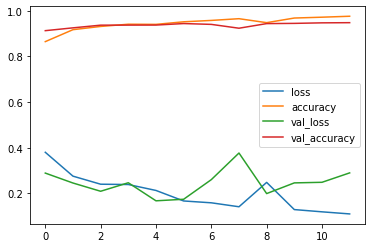

In [ ]:
pd.DataFrame(history.history).plot()

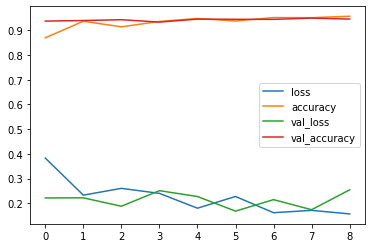

In [ ]:
pd.DataFrame(history2.history).plot()

In [ ]:
hist2 = pd.DataFrame(history2.history)

In [ ]:
hist = pd.DataFrame(history.history)

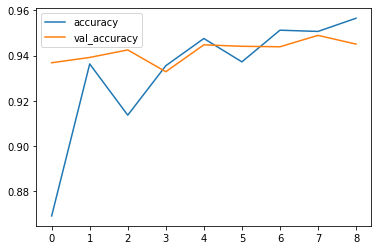

In [ ]:
hist2[['accuracy','val_accuracy']].plot()

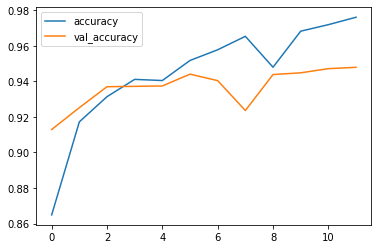

In [ ]:
hist[['accuracy','val_accuracy']].plot()

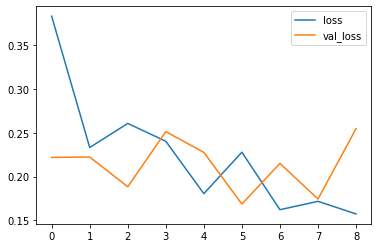

In [ ]:
hist2[['loss','val_loss']].plot()

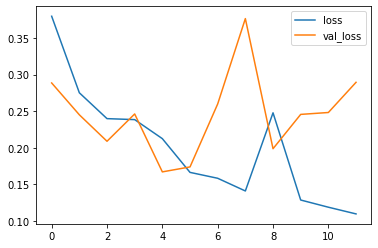

In [ ]:
hist[['loss','val_loss']].plot()

There are seems to be an overfitting problem

In [ ]:
tf.keras.backend.clear_session()
# transformer_model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_hidden_layers=2,num_labels=1, output_hidden_states=True)
transformer_model = TFRobertaForSequenceClassification.from_pretrained('roberta-base',num_hidden_layers=2,num_labels=1, output_hidden_states=True)

input_ids = tf.keras.Input(shape=(256, ),dtype='int32',name= 'input_ids')
# token_type_ids = tf.keras.Input(shape=(256, ), dtype='int32',name= 'token_type_ids')
# attention_mask = tf.keras.Input(shape=(256, ), dtype='int32',name= 'attention_mask')

transformer = transformer_model([input_ids])    
hidden_states = transformer[1] # get output_hidden_states

hidden_states_size = 2 # count of the last states 
hiddes_states_ind = list(range(-hidden_states_size, 0, 1))

selected_hiddes_states = tf.keras.layers.concatenate(tuple([hidden_states[i] for i in hiddes_states_ind]))

# Now we can use selected_hiddes_states as we want

output = tf.keras.layers.BatchNormalization()(selected_hiddes_states)
output = tf.keras.layers.Activation('elu')(output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)
model = tf.keras.models.Model(inputs = [input_ids], outputs = output)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaForSequenceClassification: ['roberta/encoder/layer_._10/attention/self/query/kernel:0', 'roberta/encoder/layer_._4/output/LayerNorm/beta:0', 'roberta/encoder/layer_._9/attention/output/dense/kernel:0', 'roberta/encoder/layer_._3/output/dense/bias:0', 'roberta/encoder/layer_._5/attention/output/LayerNorm/gamma:0', 'roberta/encoder/layer_._8/attention/output/dense/bias:0', 'roberta/encoder/layer_._11/attention/self/query/kernel:0', 'roberta/encoder/layer_._10/attention/self/value/bias:0', 'roberta/encoder/layer_._8/attention/self/value/bias:0', 'roberta/encoder/layer_._4/attention/self/value/kernel:0', 'roberta/encoder/layer_._5/attention/output/dense/kernel:0', 'roberta/encoder/layer_._11/intermediate/dense/bias:0', 'roberta/encoder/layer_._11/output/dense/bias:0', 'roberta/encoder/layer_._3/attention/self/key/bias:0', 'roberta/encoder/layer_._2/output/LayerNorm/gamma:0', 'roberta/encoder/laye

This seems to be the best model architecture, able to achieve more than 95% accuracy, the idea is to combe the hidden states output to get a better output then add batch normalization to avoid overfitting.

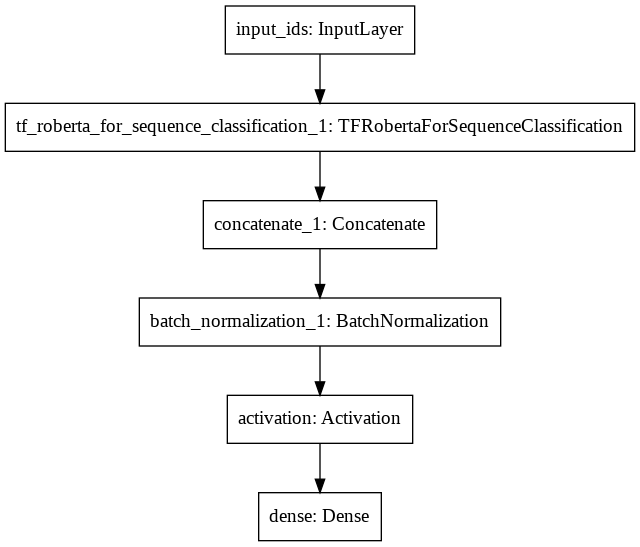

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-5, epsilon=1e-08),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(ds_train_encoded_roberta,
                    epochs=EPOCHS,
                    validation_data=(ds_valid_encoded_roberta),
                    # callbacks=callbacks
                    )

Epoch 1/9


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


681/681 [==============================] - 439s 633ms/step - loss: 0.2637 - accuracy: 0.8889 - val_loss: 0.2232 - val_accuracy: 0.9237
Epoch 2/9
681/681 [==============================] - 431s 632ms/step - loss: 0.1711 - accuracy: 0.9343 - val_loss: 0.1541 - val_accuracy: 0.9448
Epoch 3/9
681/681 [==============================] - 431s 632ms/step - loss: 0.1410 - accuracy: 0.9467 - val_loss: 0.1250 - val_accuracy: 0.9539
Epoch 4/9
681/681 [==============================] - 431s 632ms/step - loss: 0.1220 - accuracy: 0.9541 - val_loss: 0.1207 - val_accuracy: 0.9567
Epoch 5/9
681/681 [==============================] - 431s 632ms/step - loss: 0.1048 - accuracy: 0.9616 - val_loss: 0.1281 - val_accuracy: 0.9520
Epoch 6/9
681/681 [==============================] - 431s 632ms/step - loss: 0.0959 - accuracy: 0.9644 - val_loss: 0.1126 - val_accuracy: 0.9583
Epoch 7/9
681/681 [==============================] - 431s 632ms/step - loss: 0.0819 - accuracy: 0.9702 - val_loss: 0.1299 - val_accuracy: 0.

In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
model.fit(ds_train_encoded_roberta,
          epochs=3,
          validation_data=(ds_valid_encoded_roberta),
          # callbacks=callbacks
          )

Epoch 1/3
681/681 [==============================] - 431s 632ms/step - loss: 0.0545 - accuracy: 0.9805 - val_loss: 0.1322 - val_accuracy: 0.9592
Epoch 2/3
681/681 [==============================] - 431s 632ms/step - loss: 0.0465 - accuracy: 0.9836 - val_loss: 0.1839 - val_accuracy: 0.9533
Epoch 3/3
681/681 [==============================] - 431s 633ms/step - loss: 0.0398 - accuracy: 0.9856 - val_loss: 0.1423 - val_accuracy: 0.9616


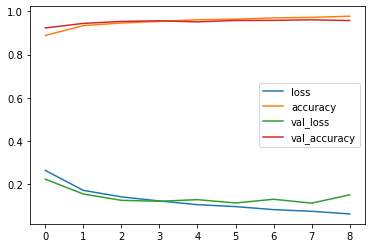

In [ ]:
hist.plot()

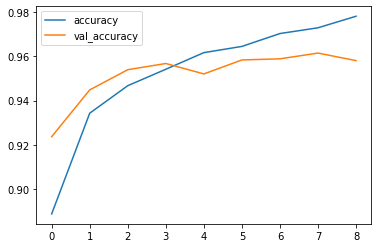

In [ ]:
hist[['accuracy','val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report


prob = model.predict(ds_valid_encoded_roberta)
pred = [int(x.mean() > .2) for x in prob]

print(classification_report(pred,y_valid))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4797
           1       0.97      0.95      0.96      4539

    accuracy                           0.96      9336
   macro avg       0.96      0.96      0.96      9336
weighted avg       0.96      0.96      0.96      9336



# Evaluation

In [ ]:
from sklearn.metrics import classification_report


prob = model.predict(ds_unseen_encoded_roberta)
pred = [int(x.mean() > .2) for x in prob]
print(classification_report(pred,y_unseen))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7581
           1       0.97      0.95      0.96      6504

    accuracy                           0.96     14085
   macro avg       0.96      0.96      0.96     14085
weighted avg       0.96      0.96      0.96     14085



In [ ]:
model.evaluate(ds_unseen_encoded_roberta)

441/441 [==============================] - 77s 174ms/step - loss: 0.1450 - accuracy: 0.9628


[0.14503303170204163, 0.9627620577812195]

In [ ]:
def predict_sentences(words,model,tokenizer,classes=['Fake','Real']):
    words = expand_contractions(words).lower()
    bert_input = convert_sentence_to_features(words,tokenizer) 
    pred = model.predict(tf.data.Dataset.from_tensor_slices(([bert_input['input_ids']], [bert_input['attention_mask']],[0])).map(map_features_to_dict))
    return classes[int(x.mean() > .2)]

In [ ]:
model.save_weights('bert_model.hdf5')

We have done data analysis and cleaning and found that the structure of the text itself, the use of words, the topic talked are biased so it's natural to have a high accuracy on the baseline model where it pick up word patterns in the text. To take care of this we tried adding more data from https://www.kaggle.com/mrisdal/fake-news. We use Bert family so that the model can differentiate the data contextually not just by word patterns in the text. Although the data itself contains a lot of indicators enough to get to that 93% accuracy RoBerta performs better in capturing the topic of the news article achieving a 96% accuracy. 

# Conclusion

In conclusion neural network shows to be one of the greatest achievements in the field of NLP, by using RoBerta we were able to capture contextually the "fake/sensational" nature of news, achieving high accuracy in this dataset test. Futhermore there are still improvements to be made.

- more datasets